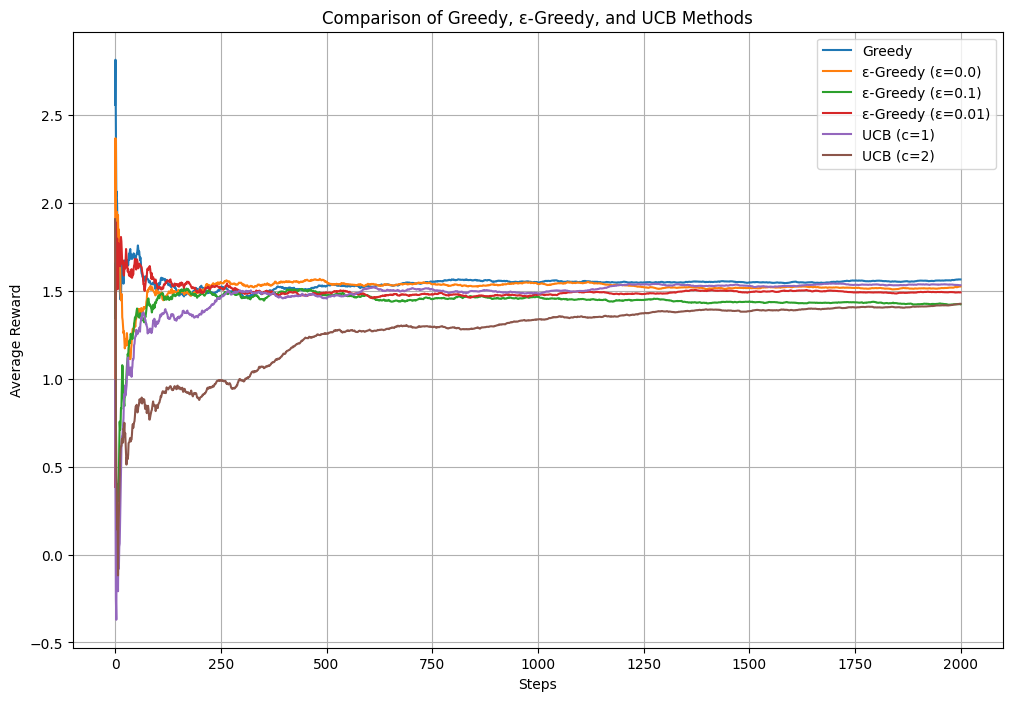

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of arms and steps
k = 10  # Number of arms
n_steps = 2000  # Number of steps
true_action_values = np.random.normal(0, 1, k)  # True action values from N(0, 1)

# Simulate reward following N(q*(A_t), 1)
def get_reward(action):
    return np.random.normal(true_action_values[action], 1)

# Greedy method
def greedy_method(n_steps):
    action_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    
    for step in range(n_steps):
        action = np.argmax(action_values)
        reward = get_reward(action)
        rewards[step] = reward
        action_counts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_counts[action]
    
    return rewards

# ε-greedy method
def epsilon_greedy_method(n_steps, epsilon):
    action_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    
    for step in range(n_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(k)
        else:
            action = np.argmax(action_values)
        reward = get_reward(action)
        rewards[step] = reward
        action_counts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_counts[action]
    
    return rewards

# UCB method
def ucb_method(n_steps, c):
    action_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    
    for step in range(n_steps):
        if step < k:  # Explore each action at least once
            action = step
        else:
            ucb_values = action_values + c * np.sqrt(np.log(step+1) / (action_counts + 1e-5))
            action = np.argmax(ucb_values)
        reward = get_reward(action)
        rewards[step] = reward
        action_counts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_counts[action]
    
    return rewards

# Simulation parameters
epsilons = [0.0, 0.1, 0.01]  # Different values of epsilon for epsilon-greedy
c_values = [1, 2]  # Different values of c for UCB

# Run simulations and plot results
plt.figure(figsize=(12, 8))

# Greedy
rewards_greedy = greedy_method(n_steps)
plt.plot(np.cumsum(rewards_greedy) / (np.arange(n_steps) + 1), label='Greedy')

# ε-Greedy
for epsilon in epsilons:
    rewards_epsilon_greedy = epsilon_greedy_method(n_steps, epsilon)
    plt.plot(np.cumsum(rewards_epsilon_greedy) / (np.arange(n_steps) + 1), label=f'ε-Greedy (ε={epsilon})')

# UCB
for c in c_values:
    rewards_ucb = ucb_method(n_steps, c)
    plt.plot(np.cumsum(rewards_ucb) / (np.arange(n_steps) + 1), label=f'UCB (c={c})')

# Plot configurations
plt.title('Comparison of Greedy, ε-Greedy, and UCB Methods')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid()
plt.show()